## Import Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque
import time
from heapq import *
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cityblock
from tqdm import tqdm

# Part 1 : Environments and Algorithms

## Code to Generate and plot Maze

In [17]:
def generate_maze(dimension, prob, show_fig = False):
    maze = np.ones((dimension, dimension))
    for i in range(dimension):
        for j in range(dimension):
            if np.random.random() <= prob:
                maze[i,j] = 0
               
    maze[0,0] = 1
    maze[dimension-1, dimension-1] = 1
    
    if show_fig:
        fig, ax = plt.subplots(figsize=(10,6))
        plt.grid(True)
        sns.heatmap(maze, ax=ax, cmap=['black','white'], cbar=False)
        title = 'Dimensions:{} | P:{}'.format(dimension, prob)
        ax.set_title(title, fontsize=15)
        plt.savefig('maze.png')
        plt.show()
    return maze, prob

## Code to plot the Path and visited nodes in the Maze

In [18]:
def plot_search_maze(maze, algo, p):
    if 1 in maze:
        fig, ax = plt.subplots(figsize=(10,6))
        sns.heatmap(maze, ax=ax, cmap=["red","blue","black","white"], cbar=False)
        title = '{} | Dimension:{} | p:{}'.format(algo, maze.shape[0], p)
        ax.set_title(title, fontsize=15)
        plt.savefig(algo+'.png')
        plt.show()
        
       
    else:
        fig, ax = plt.subplots(figsize=(10,6))
        sns.heatmap(maze, ax=ax, cmap=["red","blue","black"], cbar=False)
        title = '{} | Dimension:{} | P:{}'.format(algo, maze.shape[0], p)
        ax.set_title(title, fontsize=15)
        plt.savefig(algo+'.png')
        plt.show()
        

## Extract Neighbors

In [19]:
def get_neighbors(maze, curr_node, visited):
    
    i,j = curr_node
    neighbors = []
    
    if j+1 < len(maze):
        right = (i,j+1)
        if (maze[right]) and right not in visited:
            neighbors.append(right)

    if i+1 < len(maze):
        bottom = (i+1,j)
        if (maze[bottom]) and bottom not in visited:
            neighbors.append(bottom)

    if i-1 >= 0:
        up = (i-1,j)
        if (maze[up]) and up not in visited:
            neighbors.append(up)
    
    if j-1 >= 0:
        left = (i,j-1)
        if (maze[left]) and left not in visited:
            neighbors.append(left)
           
    return neighbors      

## Depth First Search

In [47]:
def run_dfs(maze,p, show_fig = False):
    
    import time
    
    start = time.time()
    dfs_maze = maze.copy()
    stack = []
    visited = set()
    curr_node = None
    max_fringe = 1
    parent = {}
    source = (0,0)
    goal = (dfs_maze.shape[0]-1, dfs_maze.shape[1]-1)
    path = []
    
    stack.append(source)
    while len(stack):
        
        curr_node = stack[-1]
        if curr_node not in visited:
            visited.add(curr_node)
            dfs_maze[curr_node] = -1
        
        if curr_node == goal:
            
            time_taken = time.time() - start
            node = goal
            while node != source:
                path.insert(0,node)
                dfs_maze[node] = -2
                node = parent[node]
            path.insert(0,source)
            dfs_maze[source] = -2
                
            if show_fig:
                print('Path exists')    
                plot_search_maze(dfs_maze,'Depth First Search', p)
                
            return 1, visited, path, max_fringe, time_taken
        
        neighbors = get_neighbors(dfs_maze, curr_node, visited)
        
        if len(neighbors) == 0:
            stack.pop()
           
        else:
            stack.pop()
            for neighbor in reversed(neighbors):
                if neighbor not in parent:
                    parent[neighbor] = curr_node
                    stack.append(neighbor)
            
        if max_fringe < len(stack):
            max_fringe = len(stack)
    
    if show_fig:
        print('Path does not exist')
    time_taken = time.time() - start
    return 0, visited, [], max_fringe, time_taken
    
    
    

## Breadth First Search

In [21]:
def run_bfs(maze,p, show_fig=False):
    import time
    start = time.time()
    bfs_maze = maze.copy()
    queue = deque([])
    path = []
    visited = set()
    parent = {}
    curr_node = None
    max_fringe = 1
    source = (0,0)
    goal = (bfs_maze.shape[0]-1, bfs_maze.shape[1]-1)
    
    queue.append(source)
    
    while len(queue):
        
        curr_node = queue.popleft()
        if curr_node not in visited:
            visited.add(curr_node)
            bfs_maze[curr_node] = -1
        
        if curr_node == goal:
        
            time_taken = time.time() - start
            node = goal
            while node != source:
                path.insert(0,node)
                bfs_maze[node] = -2
                node = parent[node]
            path.insert(0,source)
            bfs_maze[source] = -2
            
            if show_fig:
                print('Path exists')  
                plot_search_maze(bfs_maze, 'Breadth First Search', p)
            
            return 1, visited, path, max_fringe, time_taken
        
        neighbors = get_neighbors(bfs_maze, curr_node, visited)
        for neighbor in neighbors:
            if neighbor not in parent:
                parent[neighbor] = curr_node
                queue.append(neighbor)
           
        if max_fringe < len(queue):
            max_fringe = len(queue)
            
    if show_fig:
        print('Path does not exist')
    time_taken = time.time() - start
    return 0, visited, [], max_fringe, time_taken

## A-Star

In [22]:
def euclidean_heuristic(dimension):
    H = np.zeros((dimension, dimension))
    goal = (dimension-1, dimension-1)
    for i in range(dimension):
        for j in range(dimension):
            H[i,j] = euclidean((i,j), goal)
           
    return H

def manhattan_heuristic(dimension):
    H = np.zeros((dimension, dimension))
    goal = (dimension-1, dimension-1)
    for i in range(dimension):
        for j in range(dimension):
            H[i,j] = cityblock((i,j), goal)
           
    return H

def run_A_star(maze, heuristic, p, show_fig=False):
    import time
    
    A_star_maze = maze.copy()
    queue = []
    path = []
    visited = set()
    parent = {}
    curr_node = None
    max_fringe = 1
    source = (0,0)
    goal = (A_star_maze.shape[0]-1, A_star_maze.shape[1]-1)
    
    if heuristic == 'euclidean':
        H = euclidean_heuristic(maze.shape[0])
       
    else:
        H = manhattan_heuristic(maze.shape[0])
        
    
    start = time.time()
    heappush(queue, (H[source],0, source))
    
    while len(queue):
        
        total_cost, cost_to_source, curr_node = heappop(queue)
        if curr_node not in visited:
            visited.add(curr_node)
            A_star_maze[curr_node] = -1
        
        if curr_node == goal:

            time_taken = time.time() - start
            node = goal
            while node != source:
                path.insert(0,node)
                A_star_maze[node] = -2
                node = parent[node]
            path.insert(0,source)
            A_star_maze[source] = -2
            
            if show_fig:
                print('Path exists')
                plot_search_maze(A_star_maze, 'A-star '+heuristic, p)
                
            return 1, visited, path, max_fringe, time_taken
        
        neighbors = get_neighbors(A_star_maze, curr_node, visited)
        if len(neighbors):
            cost_to_source += 1
            for neighbor in neighbors:
                if neighbor not in parent:
                    parent[neighbor] = curr_node
                    heappush(queue, (H[neighbor]+cost_to_source, cost_to_source, neighbor))
           
        if max_fringe < len(queue):
            max_fringe = len(queue)
            
    if show_fig:
        print('Path does not exist')
    time_taken = time.time() - start
    return 0, visited, [], max_fringe, time_taken

## Driver to plot Maze

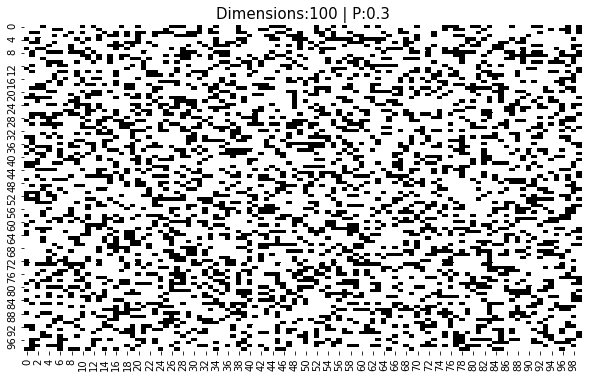

In [186]:
maze, prob = generate_maze(100,0.3,show_fig=True)

## Run DFS

Path exists


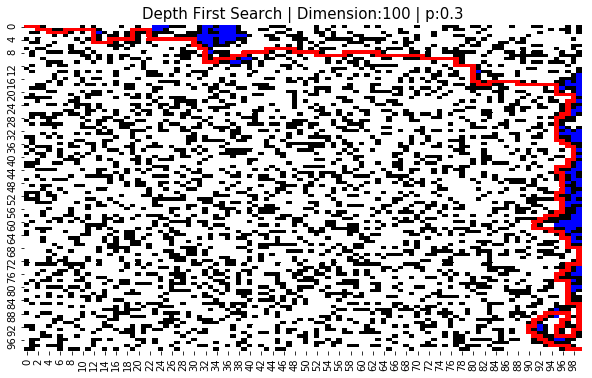

289
203


In [187]:
dfs = run_dfs(maze,prob, show_fig=True)
print(len(dfs[2]))
print(dfs[3])

## Run BFS

Path exists


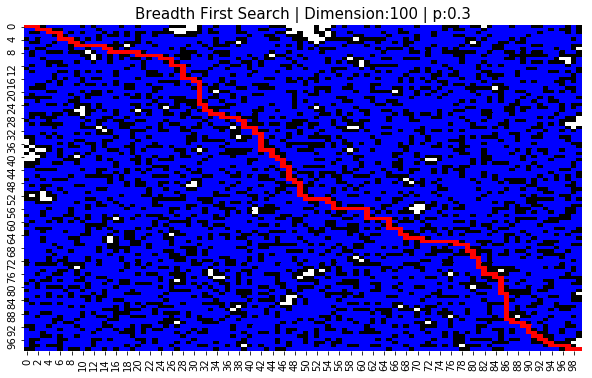

199

In [188]:
bfs = run_bfs(maze,prob,show_fig=True)
len(bfs[2])

## Run Euclidean A-Star

Path exists


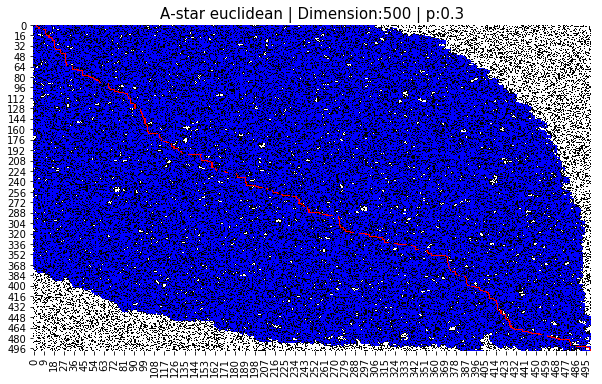

999

In [70]:
A_star = run_A_star(maze, 'euclidean',prob,show_fig=True)
len(A_star[2])

## Run Manhattan A-star

Path exists


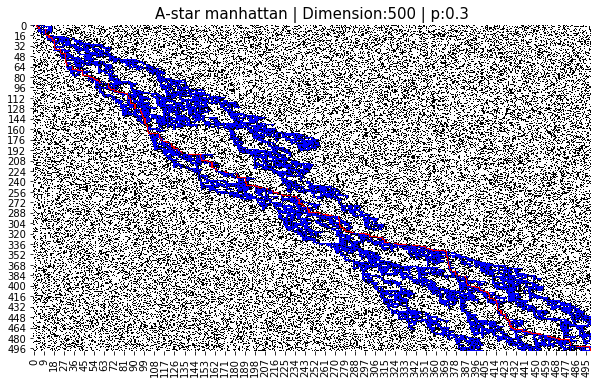

999

In [71]:
A_star = run_A_star(maze, 'manhattan', prob, show_fig=True)
len(A_star[2])

# Part 2 : Analysis and Comparisons

### 1. Find a map size (dim) that is large enough to produce maps that require some work to solve, but small enough that you can run each algorithm multiple times for a range of possible p values. How did you pick a dim?

       
       

We hypothesize that most mazes are unsolvable for p greater than 0.5. To test this Hypothesis, we generate a random maze of 1000 dimensions and test it for solvability using different p-values. For each p-value we generate 100 mazes and try to estimate the probability of it being solvable

In [13]:
solve_count = {}
for p in [0.1, 0.2, 0.3, 0.4, 0.45, 0.5]:
    solved = 0
    for i in tqdm(range(100)):
        maze, p = generate_maze(1000,p)
        dfs = run_dfs(maze, p)
        solved += dfs[0]
    solve_count[p] = solved

print(solve_count)
    

100%|██████████| 100/100 [00:49<00:00,  1.96it/s]

{0.1: 100, 0.2: 79, 0.3: 58, 0.4: 1, 0.45: 0, 0.5: 0}


Upon performing the test for solvability it was found that only 1 out of 100 mazes were solvale for p = 0.4 and no mazes were solvable for p greater than 0.45. Thus in our pursuit of finding the maximum dimension size that in practice performed a lot of heavy lifting but could be solved in a reasonable amount of time on a modern computer, we will limit our p-values from 0.1 to 0.4

## DFS

In [8]:
run_times = {}
for p in [0.1, 0.2, 0.3, 0.4]:
    p_list = []
    for dim in tqdm([1000, 3000, 5000]):
        time_list = []
        node_list = []
        for i in [1,2,3,4,5]:
            maze, p = generate_maze(dim,p)
            dfs = run_dfs(maze,p)
            time = np.round(dfs[4]*1000,0)
            nodes_visited = len(dfs[1])
            time_list.append(time)
            node_list.append(nodes_visited)
            
        p_list.append((max(time_list), max(node_list)))
    run_times[p] = p_list      


100%|██████████| 3/3 [01:28<00:00, 26.48s/it]


In [9]:
run_times

{0.1: [(31.0, 2771), (1727.0, 355529), (5483.0, 1121729)],
 0.2: [(427.0, 89335), (3539.0, 712790), (8869.0, 1786445)],
 0.3: [(3305.0, 688913), (30675.0, 6193048), (87184.0, 17198825)],
 0.4: [(2021.0, 428148), (20.0, 47), (54.0, 29)]}

## BFS

In [8]:
run_times = {}
for p in [0.1, 0.2, 0.3, 0.4]:
    p_list = []
    for dim in tqdm([500, 1000, 2000]):
        time_list = []
        node_list = []
        for i in [1,2,3,4,5]:
            maze, p = generate_maze(dim,p)
            bfs = run_bfs(maze,p)
            time = np.round(bfs[4]*1000,0)
            nodes_visited = len(bfs[1])
            time_list.append(time)
            node_list.append(nodes_visited)
            
        p_list.append((max(time_list), max(node_list)))
    run_times[p] = p_list      


100%|██████████| 3/3 [00:12<00:00,  3.92s/it]


In [9]:
run_times

{0.1: [(693.0, 225224), (2887.0, 900177), (12065.0, 3599977)],
 0.2: [(600.0, 199649), (2553.0, 798470), (10642.0, 3193282)],
 0.3: [(497.0, 172515), (2122.0, 687250), (8969.0, 2754841)],
 0.4: [(229.0, 83716), (5.0, 1250), (10.0, 167)]}

## A-star Euclidean

In [12]:
run_times = {}
for p in [0.1, 0.2, 0.3, 0.4]:
    p_list = []
    for dim in tqdm([500, 1000, 2000]):
        time_list = []
        node_list = []
        for i in [1,2,3,4,5]:
            maze, p = generate_maze(dim,p)
            A_star = run_A_star(maze,'euclidean',p)
            time = np.round(A_star[4]*1000,0)
            nodes_visited = len(A_star[1])
            time_list.append(time)
            node_list.append(nodes_visited)
            
        p_list.append((max(time_list), max(node_list)))
    run_times[p] = p_list      

100%|██████████| 3/3 [06:39<00:00, 116.63s/it]


In [13]:
run_times

{0.1: [(1094.0, 223657), (4863.0, 895408), (21092.0, 3580932)],
 0.2: [(958.0, 193185), (4202.0, 773659), (17691.0, 3100944)],
 0.3: [(830.0, 171777), (3562.0, 687868), (14854.0, 2751627)],
 0.4: [(4.0, 1197), (0.0, 128), (1.0, 389)]}

## A-Star Manhattan

In [14]:
run_times = {}
for p in [0.1, 0.2, 0.3, 0.4]:
    p_list = []
    for dim in tqdm([500, 1000, 2000]):
        time_list = []
        node_list = []
        for i in [1,2,3,4,5]:
            maze, p = generate_maze(dim,p)
            A_star = run_A_star(maze,'Manhattan',p)
            time = np.round(A_star[4]*1000,0)
            nodes_visited = len(A_star[1])
            time_list.append(time)
            node_list.append(nodes_visited)
            
        p_list.append((max(time_list), max(node_list)))
    run_times[p] = p_list      

100%|██████████| 3/3 [05:19<00:00, 93.48s/it]


In [15]:
run_times

{0.1: [(1088.0, 199511), (4740.0, 780094), (21545.0, 3158889)],
 0.2: [(692.0, 126314), (3116.0, 513909), (16002.0, 1916248)],
 0.3: [(887.0, 171660), (3795.0, 688997), (16171.0, 2752230)],
 0.4: [(361.0, 82576), (1.0, 334), (9722.0, 1847992)]}

### Generating hard Mazes

### DFS maximal path length

In [124]:
def selection(dim, prob, top):
    
    length_list = []
    maze_list = []
    top_mazes = []
    
    for i in range(100):
        maze, prob = generate_maze(dim,prob)
        dfs = run_dfs(maze,prob)
        path_length = len(dfs[2])
        if path_length:
            length_list.append(path_length)
            maze_list.append(maze)
           
       
    indices_sorted = np.argsort(length_list)[::-1][:top]
    for i in indices_sorted:
        top_mazes.append(maze_list[i])
        
    
    return top_mazes

def cross_over(top_mazes, dim):
    
    cross_over_mazes = []
    i = 0
    j = len(top_mazes) - 1
    while i < len(top_mazes):
        cross_maze = np.zeros((dim,dim))
        cross_maze[0:dim//2][:] = top_mazes[i][0:dim//2][:]
        cross_maze[dim//2:dim][:] = top_mazes[j][dim//2:dim][:]
        cross_over_mazes.append(cross_maze)
        i += 1
        j -= 1
       
    return cross_over_mazes

def mutate(cross_over_mazes, dim, prob):
    hard_mazes = []
    lengths = []
    for maze in cross_over_mazes:
        for i in range(25):
            maze[np.random.randint(1,dim-1)][np.random.randint(1,dim-1)] = 0
            
        dfs = run_dfs(maze,prob) 
        path_length = len(dfs[2])
        if path_length:
            lengths.append(path_length)
            hard_mazes.append(maze)
        
    return hard_mazes, lengths  

        


In [135]:
top_mazes = selection(100,0.35, 10)
top_mazes[0]

array([[1., 1., 1., ..., 0., 1., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 0., 1.]])

In [136]:
for i in range(100):
    cross_over_mazes = cross_over(top_mazes, 100)
    hard_mazes, lengths = mutate(cross_over_mazes, 100, 0.35)
len(hard_mazes)

    

9

In [137]:
max_length = max(lengths)
idx = lengths.index(max_length)
hardest_maze = hard_mazes[idx]
print(max_length)

769


Path exists


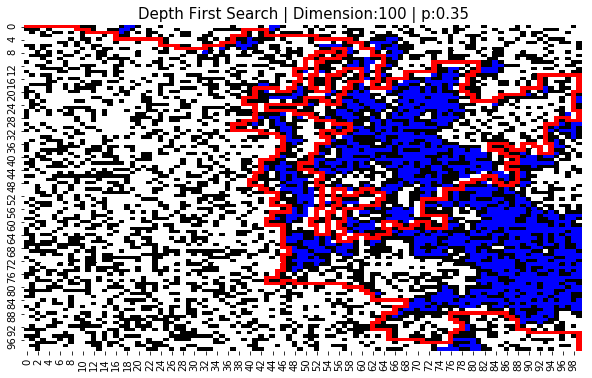

769

In [138]:
dfs = run_dfs(hardest_maze,0.35, True)
len(dfs[2])

## DFS max fringe

In [139]:
def selection(dim, prob, top):
    
    fringe_size_list = []
    maze_list = []
    top_mazes = []
    
    for i in range(100):
        maze, prob = generate_maze(dim,prob)
        dfs = run_dfs(maze,prob)
        fringe_size = dfs[3]
        if dfs[0]:
            fringe_size_list.append(fringe_size)
            maze_list.append(maze)
           
       
    indices_sorted = np.argsort(fringe_size_list)[::-1][:top]
    for i in indices_sorted:
        top_mazes.append(maze_list[i])
        
    
    return top_mazes

def cross_over(top_mazes, dim):
    
    cross_over_mazes = []
    i = 0
    j = len(top_mazes) - 1
    while i < len(top_mazes):
        cross_maze = np.zeros((dim,dim))
        cross_maze[0:dim//2][:] = top_mazes[i][0:dim//2][:]
        cross_maze[dim//2:dim][:] = top_mazes[j][dim//2:dim][:]
        cross_over_mazes.append(cross_maze)
        i += 1
        j -= 1
       
    return cross_over_mazes

def mutate(cross_over_mazes, dim, prob):
    hard_mazes = []
    fringe_sizes = []
    for maze in cross_over_mazes:
        for i in range(25):
            maze[np.random.randint(1,dim-1)][np.random.randint(1,dim-1)] = 0
            
        dfs = run_dfs(maze,prob) 
        fringe_size = dfs[3]
        if dfs[0]:
            fringe_sizes.append(fringe_size)
            hard_mazes.append(maze)
        
    return hard_mazes, fringe_sizes  

        


In [149]:
top_mazes = selection(100,0.35, 10)
for i in range(100):
    cross_over_mazes = cross_over(top_mazes, 100)
    hard_mazes, fringe_sizes = mutate(cross_over_mazes, 100, 0.35)

max_fringe_size = max(fringe_sizes)
idx = fringe_sizes.index(max_fringe_size)
hardest_maze = hard_mazes[idx]
print(max_fringe_size)

608


Path exists


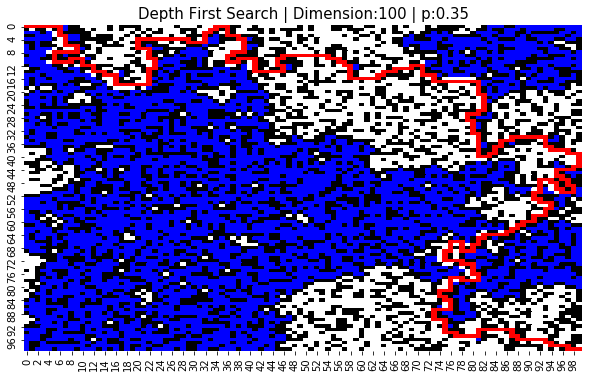

608
399


In [151]:
dfs = run_dfs(hardest_maze,0.35, True)
print(dfs[3])
print(len(dfs[2]))

## A_star with max nodes expanded

In [169]:
def selection(dim, prob, top):
    
    visited_list = []
    maze_list = []
    top_mazes = []
    
    for i in range(100):
        maze, prob = generate_maze(dim,prob)
        A_star = run_A_star(maze,'Manhattan',prob)
        visited_size = len(A_star[1])
        if A_star[0]:
            visited_list.append(visited_size)
            maze_list.append(maze)
           
       
    indices_sorted = np.argsort(visited_list)[::-1][:top]
    for i in indices_sorted:
        top_mazes.append(maze_list[i])
        
    
    return top_mazes

def cross_over(top_mazes, dim):
    
    cross_over_mazes = []
    i = 0
    j = len(top_mazes) - 1
    while i < len(top_mazes):
        cross_maze = np.zeros((dim,dim))
        cross_maze[0:dim//2][:] = top_mazes[i][0:dim//2][:]
        cross_maze[dim//2:dim][:] = top_mazes[j][dim//2:dim][:]
        cross_over_mazes.append(cross_maze)
        i += 1
        j -= 1
       
    return cross_over_mazes

def mutate(cross_over_mazes, dim, prob):
    hard_mazes = []
    visited_sizes = []
    for maze in cross_over_mazes:
        for i in range(25):
            maze[np.random.randint(1,dim-1)][np.random.randint(1,dim-1)] = 0
            
        A_star = run_A_star(maze,'Manhattan',prob) 
        visited_size = len(A_star[1])
        if A_star[0]:
            visited_sizes.append(visited_size)
            hard_mazes.append(maze)
        
    return hard_mazes, visited_sizes  

        


In [170]:
top_mazes = selection(100,0.35, 10)
for i in range(100):
    cross_over_mazes = cross_over(top_mazes, 100)
    hard_mazes, visited_sizes = mutate(cross_over_mazes, 100, 0.35)

max_visit_size = max(visited_sizes)
idx = visited_sizes.index(max_visit_size)
hardest_maze = hard_mazes[idx]
print(max_visit_size)

5336


Path exists


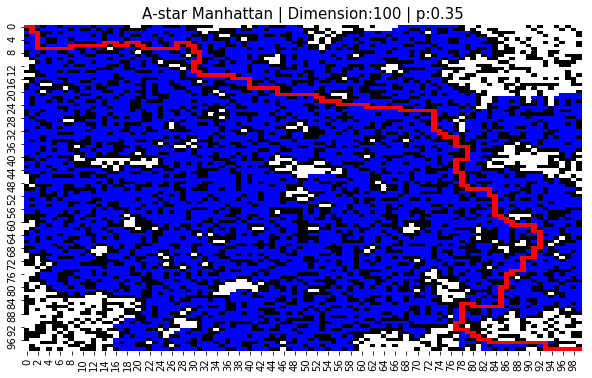

5336

In [171]:
A_star = run_A_star(hardest_maze,'Manhattan', 0.35,True)
len(A_star[1])

## A_star with max_fringe

In [173]:
def selection(dim, prob, top):
    
    fringe_size_list = []
    maze_list = []
    top_mazes = []
    
    for i in range(100):
        maze, prob = generate_maze(dim,prob)
        A_star = run_A_star(maze,'Manhattan',prob)
        fringe_size = A_star[3]
        if A_star[0]:
            fringe_size_list.append(fringe_size)
            maze_list.append(maze)
           
       
    indices_sorted = np.argsort(fringe_size_list)[::-1][:top]
    for i in indices_sorted:
        top_mazes.append(maze_list[i])
        
    
    return top_mazes

def cross_over(top_mazes, dim):
    
    cross_over_mazes = []
    i = 0
    j = len(top_mazes) - 1
    while i < len(top_mazes):
        cross_maze = np.zeros((dim,dim))
        cross_maze[0:dim//2][:] = top_mazes[i][0:dim//2][:]
        cross_maze[dim//2:dim][:] = top_mazes[j][dim//2:dim][:]
        cross_over_mazes.append(cross_maze)
        i += 1
        j -= 1
       
    return cross_over_mazes

def mutate(cross_over_mazes, dim, prob):
    hard_mazes = []
    fringe_sizes = []
    for maze in cross_over_mazes:
        for i in range(25):
            maze[np.random.randint(1,dim-1)][np.random.randint(1,dim-1)] = 0
            
        A_star = run_A_star(maze,'Manhattan',prob) 
        fringe_size = A_star[3]
        if A_star[0]:
            fringe_sizes.append(fringe_size)
            hard_mazes.append(maze)
        
    return hard_mazes, fringe_sizes  

        


In [174]:
top_mazes = selection(100,0.35, 10)
for i in range(100):
    cross_over_mazes = cross_over(top_mazes, 100)
    hard_mazes, fringe_sizes = mutate(cross_over_mazes, 100, 0.35)

max_fringe_size = max(fringe_sizes)
idx = fringe_sizes.index(max_fringe_size)
hardest_maze = hard_mazes[idx]
print(max_fringe_size)

324


Path exists


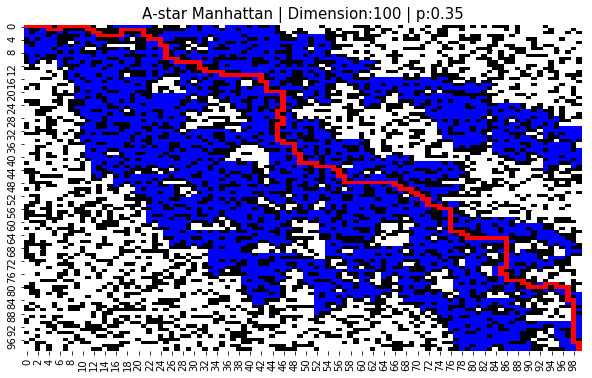

324

In [175]:
A_star = run_A_star(hardest_maze, 'Manhattan', 0.35, True)
A_star[3]

## A_star Thinning

In [ ]:
def Solve_ThiningAstar(maze,start,goal,dim,prob):
    print("Thining A star")
    maze_org = copy.deepcopy(maze)
    assert(prob > 0.02)
    blocked_nodes = int(dim * dim * prob)
    new_blocked_nodes = int(dim * dim * (prob*0.5)) # reduce number of blockages by 50% of current value
    blockage_to_remove = blocked_nodes - new_blocked_nodes

    # Simplified maze
    while blockage_to_remove > 0:
        row = random.randint(0,dim-1)
        column = random.randint(0,dim-1)
        while maze[row][column] == 0:
            row = random.randint(0,dim-1)
            column = random.randint(0,dim-1)
        maze[row][column] = 0
        blockage_to_remove -= 1

    total_eu = math.sqrt(2*((dim-1)**2))
    assert (maze[0][0] == 0) and (maze[dim-1][dim-1] == 0)
    Path_queue = queue.PriorityQueue()
    Path_queue.put((total_eu,[start]))
    Visited = set()
    Done_find = False;
    path =[]
    while not Path_queue.empty() and not Done_find:
        path_full = Path_queue.get()
        path = path_full[-1]
        node = path[-1]

        if node == goal:
            break
        elif node not in Visited:
            for node_child in GetChildNodeforParentWithThining(maze_org,maze,node,dim,(dim*dim)-1,"Euclidean",Visited):
                if node_child[0] not in Visited:
                    path_1 = list(path)
                    path_1.append(node_child[0])
                    Path_queue.put((node_child[1],path_1))
                    if node_child[0] == goal:
                        Done_find = True
                        path = path_1
                        break
        Visited.add(node)

    #print("Explored cells - %d\n"%(len(Visited)+1),end="")
    #print("Path length - %d"%len(path))
    return path,maze_org